In [233]:
import pandas as pd
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

# Extract Pneumonia Cohort

Before using ehrapy, we need to preprocess data and extract and merge the information we want and need.

First, we need to load the data into a pandas dataframe. To get an overview, we need informations on the icustay, the hospital admission and diagnoses.

In [113]:
# df = pd.read_parquet("mimiciv/2.0/admissions.parquet")
# df2 = pd.read_parquet("mimiciv/2.0/diagnoses_icd.parquet")
# df3 = pd.read_parquet("mimiciv/2.0/outputevents.parquet")

1. Load the feature datasets we need. We generated these using the mainPipeline notebook. These data are raw and unfiltered. (if wanting to start from raw, unfiltered cohort). Takes approximately 40s to load all of these datasets (chart data is particularly large)

In [234]:
# load the icd diagnoses definition table
icd_diagnoses_df = pd.read_csv("data/features/preproc_diag_icu.csv.gz")
# load the chart table
icd_chart_df = pd.read_csv("data/features/preproc_chart_icu.csv.gz")
# load the icd diagnoses definition table
icd_med_df = pd.read_csv("data/features/preproc_med_icu.csv.gz")
# load the icd diagnoses definition table
icd_out_df = pd.read_csv("data/features/preproc_out_icu.csv.gz")
# load the icd diagnoses definition table
icd_proc_df = pd.read_csv("data/features/preproc_proc_icu.csv.gz")
# load info on the ICU stays
icu_stay_df = pd.read_csv("data/cohort/cohort_icu_mortality_0_.csv.gz")
microbio_df = pd.read_csv("mimiciv/2.0/hosp/microbiiologyevents.csv.gz")

emar_df = pd.read_csv("./mimiciv/2.0/hosp/emar.csv.gz")
pharma_df = pd.read_csv("./mimiciv/2.0/hosp/pharmacy.csv.gz")

icu_stay_df = pd.read_csv("data/cohort/cohort_icu_mortality_0_.csv.gz")

# human readable labels for ICU items (itemid) and icd diagnoses.
d_items = pd.read_csv("mimiciv/2.0/icu/d_items.csv.gz")  # Ensure this file contains 'itemid' and 'label' columns
d_icd_diagnoses = pd.read_csv("mimiciv/2.0/hosp/d_icd_diagnoses.csv.gz")

<positron-console-cell-234>:14: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.


2. Add human readable labels to diagnoses in the cohort to aid in diagnoses selection.

In [236]:
icd_diagnoses_df = icd_diagnoses_df.merge(d_icd_diagnoses[['icd_code', 'long_title']], left_on='new_icd_code', right_on='icd_code', how='left')


Add readable labels to disease types and create a disease category column.

In [237]:
# make new column for disease type w/default level "unknown"
icd_diagnoses_df["disease_type"] = "Unknown" 
# define known disease types
icd_diagnoses_df.loc[
    ("A00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "B99"),
    "disease_type",
] = "Infection"
icd_diagnoses_df.loc[
    ("C00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "D48"),
    "disease_type",
] = "Neoplasm"
icd_diagnoses_df.loc[
    ("D50" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "D89"),
    "disease_type",
] = "Blood and Immune system"
icd_diagnoses_df.loc[
    ("E00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "E90"),
    "disease_type",
] = "Metabolism and Endocrine"
icd_diagnoses_df.loc[
    ("F00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "F99"),
    "disease_type",
] = "Psych"
icd_diagnoses_df.loc[
    ("G00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "G99"),
    "disease_type",
] = "Nervous system"
icd_diagnoses_df.loc[
    ("H00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "H59"),
    "disease_type",
] = "Eye"
icd_diagnoses_df.loc[
    ("H60" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "H95"),
    "disease_type",
] = "Ear"
icd_diagnoses_df.loc[
    ("I00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "I99"),
    "disease_type",
] = "Cardiovascular"
icd_diagnoses_df.loc[
    ("J00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "J99"),
    "disease_type",
] = "Respiratory"
icd_diagnoses_df.loc[
    ("K00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "K93"),
    "disease_type",
] = "Digestive system"
icd_diagnoses_df.loc[
    ("L00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "L99"),
    "disease_type",
] = "Skin"
icd_diagnoses_df.loc[
    ("M00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "M99"),
    "disease_type",
] = "Musculosceletal"
icd_diagnoses_df.loc[
    ("N00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "N99"),
    "disease_type",
] = "Urogenital system"
icd_diagnoses_df.loc[
    ("O00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "O99"),
    "disease_type",
] = "Prae-/Neonatal"
icd_diagnoses_df.loc[
    ("P00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "P96"),
    "disease_type",
] = "Perinatal"
icd_diagnoses_df.loc[
    ("Q00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "Q99"),
    "disease_type",
] = "Malformations"
icd_diagnoses_df.loc[
    ("R00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "R99"),
    "disease_type",
] = "Other"
icd_diagnoses_df.loc[
    ("S00" <= icd_diagnoses_df["new_icd_code"])
    & (icd_diagnoses_df["new_icd_code"] <= "Y98"),
    "disease_type",
] = "Posoning, Injury or External"



In [238]:

icd_diagnoses_df.rename(columns={'long_title': 'disease_name'}, inplace=True)

icd_diagnoses_df.drop(columns=['new_icd_code'], inplace=True)

icd_diagnoses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686996 entries, 0 to 1686995
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   subject_id    1686996 non-null  int64 
 1   hadm_id       1686996 non-null  int64 
 2   stay_id       1686996 non-null  int64 
 3   icd_code      1686996 non-null  object
 4   disease_name  1686996 non-null  object
 5   disease_type  1686996 non-null  object
dtypes: int64(3), object(3)
memory usage: 77.2+ MB


## 3. Prepare icu data for joining with diagnoses and other datasets

Was there a death in hospital?

In [239]:
icu_stay_df = icu_stay_df.rename(columns={'label':'hospital_death'})

In [240]:
# Convert to datetime
icu_stay_df['intime'] = pd.to_datetime(icu_stay_df['intime'])
icu_stay_df['outtime'] = pd.to_datetime(icu_stay_df['outtime'])

# Calculate ICU Length of Stay (LOS) in **hrs**
icu_stay_df['los'] = (icu_stay_df['outtime'] - icu_stay_df['intime']).dt.total_seconds() / 3600 #(60 * 60 * 24) for days

In [241]:
icu_stay_df.describe()

,subject_id,stay_id,intime,outtime,Age,hospital_death,hadm_id,los
count,9.444400e+04,9.444400e+04,94444,94444,94444.000000,94444.000000,9.444400e+04,94444.000000
mean,1.500423e+07,3.499823e+07,2153-10-25 00:27:10.639859712,2153-10-28 15:34:24.787058688,63.039780,0.071439,2.498162e+07,87.120596
min,1.000003e+07,3.000015e+07,2110-01-11 10:16:06,2110-01-12 17:17:47,18.000000,0.000000,2.000009e+07,0.030000
25%,1.251469e+07,3.250671e+07,2133-11-20 07:38:10.499999744,2133-11-23 07:15:37.749999616,53.000000,0.000000,2.248155e+07,26.309097
50%,1.500515e+07,3.499944e+07,2153-09-27 15:10:57.000000512,2153-10-01 12:22:23.000000512,65.000000,0.000000,2.498182e+07,47.175556
75%,1.751771e+07,3.749097e+07,2173-11-21 23:04:30,2173-11-26 18:02:40.250000384,76.000000,0.000000,2.746508e+07,92.701806
max,1.999999e+07,3.999986e+07,2214-07-22 17:05:53,2214-07-26 17:13:57,91.000000,1.000000,2.999983e+07,5433.673889
std,2.884057e+06,2.886443e+06,NaN,NaN,16.716351,0.257558,2.884105e+06,129.659365


In [242]:
# Filter diagnoses to keep only admissions that had a J18 (pneumonia) diagnosis and then create an object with the hadm_ids for these
# patients and another for the icu stays linked to these patients

pneumonia_hadm_ids = icd_diagnoses_df[icd_diagnoses_df["icd_code"].str.startswith("J18")]["hadm_id"].unique()
pneumonia_stay_ids = icd_diagnoses_df[icd_diagnoses_df["icd_code"].str.startswith("J18")]["stay_id"].unique()

icd_diagnoses_filtered = icd_diagnoses_df[icd_diagnoses_df["stay_id"].isin(pneumonia_stay_ids)].copy()


In [348]:
pharma_filtered_df = pharma_df[pharma_df["hadm_id"].isin(pneumonia_hadm_ids)].copy()

In [165]:
icd_diagnoses_filtered.head()

,subject_id,hadm_id,stay_id,icd_code,disease_name,disease_type
78,10001843,26133978,39698942,A41,Other sepsis,Infection
79,10001843,26133978,39698942,J96,"Respiratory failure, not elsewhere classified",Respiratory
80,10001843,26133978,39698942,I50,Heart failure,Cardiovascular
81,10001843,26133978,39698942,J18,"Pneumonia, unspecified organism",Respiratory
82,10001843,26133978,39698942,J96,"Respiratory failure, not elsewhere classified",Respiratory


In [166]:
# general overview of diagnoses data
display.display(icd_diagnoses_filtered.info(show_counts=1))
display.display(icd_diagnoses_filtered.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 223583 entries, 78 to 1686954
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   subject_id    223583 non-null  int64 
 1   hadm_id       223583 non-null  int64 
 2   stay_id       223583 non-null  int64 
 3   icd_code      223583 non-null  object
 4   disease_name  223583 non-null  object
 5   disease_type  223583 non-null  object
dtypes: int64(3), object(3)
memory usage: 11.9+ MB


None

,subject_id,hadm_id,stay_id
count,2.235830e+05,2.235830e+05,2.235830e+05
mean,1.506896e+07,2.505249e+07,3.499854e+07
std,2.859816e+06,2.861801e+06,2.866951e+06
min,1.000184e+07,2.000177e+07,3.000048e+07
25%,1.264381e+07,2.261562e+07,3.254806e+07
50%,1.507661e+07,2.511494e+07,3.497759e+07
75%,1.758152e+07,2.750955e+07,3.747310e+07
max,1.999962e+07,2.999950e+07,3.999923e+07


In [167]:
# general overview of icu data
display.display(icu_stay_df.info(show_counts=1))
display.display(icu_stay_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94444 entries, 0 to 94443
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   subject_id  94444 non-null  int64         
 1   stay_id     94444 non-null  int64         
 2   intime      94444 non-null  datetime64[ns]
 3   outtime     94444 non-null  datetime64[ns]
 4   Age         94444 non-null  int64         
 5   gender      94444 non-null  object        
 6   ethnicity   94444 non-null  object        
 7   insurance   94444 non-null  object        
 8   label       94444 non-null  int64         
 9   dod         94444 non-null  object        
 10  hadm_id     94444 non-null  int64         
 11  los         94444 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(4)
memory usage: 8.6+ MB


None

,subject_id,stay_id,intime,outtime,Age,label,hadm_id,los
count,9.444400e+04,9.444400e+04,94444,94444,94444.000000,94444.000000,9.444400e+04,94444.000000
mean,1.500423e+07,3.499823e+07,2153-10-25 00:27:10.639859712,2153-10-28 15:34:24.787058688,63.039780,0.071439,2.498162e+07,87.120596
min,1.000003e+07,3.000015e+07,2110-01-11 10:16:06,2110-01-12 17:17:47,18.000000,0.000000,2.000009e+07,0.030000
25%,1.251469e+07,3.250671e+07,2133-11-20 07:38:10.499999744,2133-11-23 07:15:37.749999616,53.000000,0.000000,2.248155e+07,26.309097
50%,1.500515e+07,3.499944e+07,2153-09-27 15:10:57.000000512,2153-10-01 12:22:23.000000512,65.000000,0.000000,2.498182e+07,47.175556
75%,1.751771e+07,3.749097e+07,2173-11-21 23:04:30,2173-11-26 18:02:40.250000384,76.000000,0.000000,2.746508e+07,92.701806
max,1.999999e+07,3.999986e+07,2214-07-22 17:05:53,2214-07-26 17:13:57,91.000000,1.000000,2.999983e+07,5433.673889
std,2.884057e+06,2.886443e+06,NaN,NaN,16.716351,0.257558,2.884105e+06,129.659365


In [243]:
icd_diagnoses_filtered['disease_type'].unique()

array(['Infection', 'Respiratory',
       'Cardiovascular', 'Other',
       'Metabolism and Endocrine',
       'Neoplasm', 'Blood and Immune system',
       'Nervous system', 'Unknown',
       'Urogenital system',
       'Digestive system', 'Psych', 'Eye',
       'Posoning, Injury or External',
       'Malformations', 'Musculosceletal',
       'Skin', 'Prae-/Neonatal', 'Ear'],
      dtype=object)

To reduce the amount of noise, we calculated and added only the minimum, maximum and average of all measurements that had multiple values per patient. 

All further diagnoses and microbiology and medication information were included into the observations slot to ensure that the data were not used for the calculation of embeddings but were still available for the analysis. 

This ensured that any calculated embedding would not be divided into treated and untreated groups but, rather, solely based on phenotypic features. We imputed all missing data through k-nearest neighbors imputation (k = 20) using the knn_impute function of ehrapy. Next, we log normalized the data with ehrapy using the log_norm function. Afterwards, we winsorized the data using ehrapy’s winsorize function to obtain 277 ICU visits (n = 265 patients) with 572 features. Of those 572 features, 254 were stored in the matrix X and the remaining 318 in the ‘obs’ slot in the AnnData object. For clustering and visualization purposes, we calculated 50 principal components using ehrapy’s pca function. The obtained principal component representation was then used to calculate a nearest neighbors graph using the neighbors function of ehrapy. The nearest neighbors graph then served as the basis for a UMAP embedding calculation using ehrapy’s umap function.

In [244]:
# Step 1: Get stay_id that have at least one J18 diagnosis
j18_stay_ids = icd_diagnoses_filtered.loc[icd_diagnoses_filtered["icd_code"] == "J18", "stay_id"].unique()

# Step 2: Get all hadm_ids in the dataset
all_stay_ids = icd_diagnoses_filtered["stay_id"].unique()

# Step 3: Find hadm_ids that are missing J18
missing_j18_stay_ids = set(all_stay_ids) - set(j18_stay_ids)

# Step 4: Output results
if missing_j18_stay_ids:
    print(f"⚠️ {len(missing_j18_stay_ids)} stay_ids do NOT have J18 diagnoses!")
    print(missing_j18_stay_ids)
else:
    print("✅ All stay_ids have at least one J18 diagnosis!")


✅ All stay_ids have at least one J18 diagnosis!


In [245]:
top_15 = icd_diagnoses_filtered[["icd_code", "disease_name"]].value_counts().head(15)

In [246]:
# Step 1: Check that icd_diagnoses_filtered is not empty
if icd_diagnoses_filtered.empty:
    raise ValueError("⚠️ icd_diagnoses_filtered is empty! Check earlier filtering steps.")

# Step 2: Get the top 15 most common diagnoses
top_15_diag = icd_diagnoses_filtered["icd_code"].value_counts().head(15)

# Debug: Check if top_15_diag is empty
print("Top 15 Diagnoses:\n", top_15_diag)

# Step 3: Ensure J18 is in the list
if "J18" not in top_15_diag.index:
    j18_count = icd_diagnoses_filtered["icd_code"].eq("J18").sum()
    top_15_diag = pd.concat([top_15_diag, pd.Series([j18_count], index=["J18"])])

# Ensure icd_code is of the same type
top_15_diag.index = top_15_diag.index.astype(str)
icd_diagnoses_filtered["icd_code"] = icd_diagnoses_filtered["icd_code"].astype(str)

# Step 4: Check that pneumonia_hadm_ids is not empty
if len(pneumonia_hadm_ids) == 0:
    raise ValueError("⚠️ pneumonia_stay_ids is empty! Check J18 filtering.")

# Step 5: Filter the DataFrame to include only J18 + top diagnoses
icd_diagnoses_cleaned = icd_diagnoses_filtered[
    (icd_diagnoses_filtered['stay_id'].isin(pneumonia_stay_ids)) & 
    (icd_diagnoses_filtered['icd_code'].isin(top_15_diag.index))
].copy()

# Debug: Check if filtering worked
print("Number of diagnoses after filtering:", len(icd_diagnoses_cleaned))

# Step 6: Add diagnosis counts
icd_diagnoses_cleaned["diagnoses_count"] = icd_diagnoses_cleaned["icd_code"].map(top_15_diag)

# Display cleaned data
print(icd_diagnoses_cleaned)


Top 15 Diagnoses:
 icd_code
E87    9892
J18    9867
I50    5639
N17    4937
J96    4146
E11    4117
I25    4086
E78    3945
J98    3897
Z51    3624
I47    3332
I10    3275
D64    2875
Z95    2873
N18    2865
Name: count, dtype: int64
Number of diagnoses after filtering: 69370
         subject_id  ...  diagnoses_count
79         10001843  ...             4146
80         10001843  ...             5639
81         10001843  ...             9867
82         10001843  ...             4146
97         10001843  ...             9892
...             ...  ...              ...
1686940    19999625  ...             9867
1686941    19999625  ...             4937
1686942    19999625  ...             9892
1686947    19999625  ...             2865
1686954    19999625  ...             2873

[69370 rows x 7 columns]


In [247]:
icd_diagnoses_cleaned.describe()
icd_diagnoses_cleaned[['subject_id']].nunique()

#icd_diagnoses_df['num_diagnoses'] = icd_diagnoses_df.groupby('stay_id')['icd_code'].transform('count')


subject_id    7518
dtype: int64

- There are 7518 unique patients in our pneumonia cohort.

- There are 9864 unique icu visits

- There and 8196 unique hospital visits (multiple icu visits are possible for each hospital stay)

In [248]:
icd_diagnoses_cleaned[['stay_id']].nunique()
icd_diagnoses_cleaned[['hadm_id']].nunique()

hadm_id    8196
dtype: int64

In [249]:
# Aggregate by hadm_id: Store all ICD codes as a list
icd_agg_list = icd_diagnoses_cleaned.groupby("stay_id").agg(
    icd_codes=("icd_code", lambda x: list(x)),  # Store diagnoses as a list
    diagnoses=("disease_name", lambda x: list(x)),
    disease_categories=("disease_type", lambda x: list(set(x)))  # Unique disease categories
).reset_index()

icd_agg_list_hosp = icd_diagnoses_cleaned.groupby("hadm_id").agg(
    icd_codes=("icd_code", lambda x: list(x)),  # Store diagnoses as a list
    diagnoses=("disease_name", lambda x: list(x)),
    disease_categories=("disease_type", lambda x: list(set(x)))  # Unique disease categories
).reset_index()

In [250]:
icd_agg_list


,stay_id,icd_codes,diagnoses,disease_categories
0,30000484,"[J18, J98, I50, I25, I50, E78, N18, Z95]","[Pneumonia, unspecified organism, Other respir...","[Urogenital system, Cardiovascular, Metabolism..."
1,30000831,"[I50, J96, J18, N17, E87, N18, I25, I25, E87]","[Heart failure, Respiratory failure, not elsew...","[Metabolism and Endocrine, Cardiovascular, Uro..."
2,30002498,"[J18, D64, I25, Z51, Z51, Z95]","[Pneumonia, unspecified organism, Other anemia...","[Unknown, Cardiovascular, Blood and Immune sys..."
3,30003598,"[J18, I10, E11]","[Pneumonia, unspecified organism, Essential (p...","[Metabolism and Endocrine, Cardiovascular, Res..."
4,30004320,"[J18, I50, I50, I25, I10, E78, I25]","[Pneumonia, unspecified organism, Heart failur...","[Metabolism and Endocrine, Cardiovascular, Res..."
...,...,...,...,...
9859,39993425,"[J18, J96, E87, N17, E87, I50]","[Pneumonia, unspecified organism, Respiratory ...","[Metabolism and Endocrine, Urogenital system, ..."
9860,39995213,"[J18, E11, I10]","[Pneumonia, unspecified organism, Type 2 diabe...","[Metabolism and Endocrine, Cardiovascular, Res..."
9861,39997710,"[N17, J18, E87, E87]","[Acute kidney failure, Pneumonia, unspecified ...","[Metabolism and Endocrine, Urogenital system, ..."
9862,39999168,"[I50, N17, J96, J18, E87, E87, N17, Z51, I25, ...","[Heart failure, Acute kidney failure, Respirat...","[Urogenital system, Cardiovascular, Metabolism..."


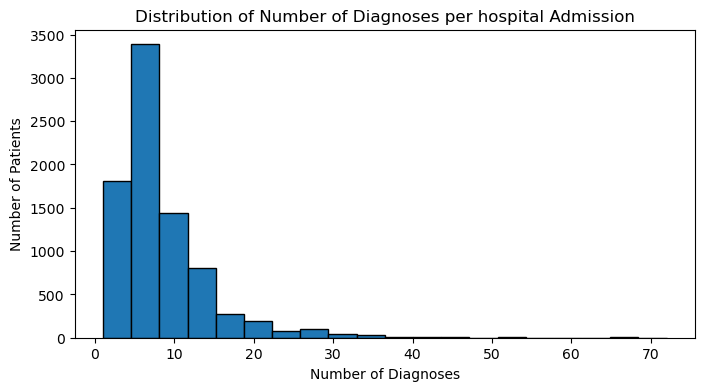

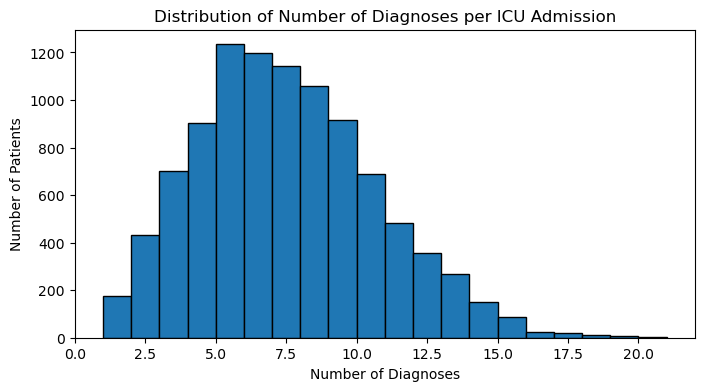

In [251]:

icd_agg_list_hosp["num_diagnoses"] = icd_agg_list_hosp["icd_codes"].apply(len)

plt.figure(figsize=(8, 4))
plt.hist(icd_agg_list_hosp["num_diagnoses"], bins=20, edgecolor="black")
plt.title("Distribution of Number of Diagnoses per hospital Admission")
plt.xlabel("Number of Diagnoses")
plt.ylabel("Number of Patients")
plt.show()

icd_agg_list["num_diagnoses"] = icd_agg_list["icd_codes"].apply(len)

plt.figure(figsize=(8, 4))
plt.hist(icd_agg_list["num_diagnoses"], bins=20, edgecolor="black")
plt.title("Distribution of Number of Diagnoses per ICU Admission")
plt.xlabel("Number of Diagnoses")
plt.ylabel("Number of Patients")
plt.show()

Lets filter all dfs to keep only the relevant hadm_ids & stay_ids for our pneumonia cohort using the objects we created earlier

- diagnoses are directly tied to the hospital df.

In [252]:
import os

# Define the directory to save cleaned files
save_dir = "./notebooks/cohort_dfs"
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist

# Ensure the filtered DataFrames retain original columns
filtered_dfs = {
    "icd_chart_df": icd_chart_df[icd_chart_df["stay_id"].isin(pneumonia_stay_ids)].copy(),
    "icd_med_df": icd_med_df[icd_med_df["stay_id"].isin(pneumonia_stay_ids)].copy(),
    "icd_out_df": icd_out_df[icd_out_df["stay_id"].isin(pneumonia_stay_ids)].copy(),
    "icd_proc_df": icd_proc_df[icd_proc_df["stay_id"].isin(pneumonia_stay_ids)].copy(),
    "icu_stay_df": icu_stay_df[icu_stay_df["stay_id"].isin(pneumonia_stay_ids)].copy(),
    "microbio_df": microbio[microbio['hadm_id'].isin(pneumonia_hadm_ids)].copy(),
    "pharma_df": pharma_df[pharma_df['hadm_id'].isin(pneumonia_hadm_ids)].copy(),
    'emar_df': emar_df[emar_df['hadm_id'].isin(pneumonia_hadm_ids)].copy()
}

# Ensure empty DataFrames still have expected columns & Save each DataFrame
for name, df in filtered_dfs.items():
    if df.empty:
        print(f"⚠ WARNING: {name} is empty after filtering!")
        df = df.reindex(columns=icd_chart_df.columns if "chart" in name else icd_med_df.columns)
    
    # Save DataFrame to CSV
    save_path = os.path.join(save_dir, f"{name}.csv.gz")
    df.to_csv(save_path, index=False)
    print(f"✅ Saved {name} to {save_path}")

# Unpack filtered DataFrames
icd_chart_df, icd_med_df, icd_out_df, icd_proc_df, icu_stay_df, microbio_df = (
    filtered_dfs["icd_chart_df"],
    filtered_dfs["icd_med_df"],
    filtered_dfs["icd_out_df"],
    filtered_dfs["icd_proc_df"],
    filtered_dfs["icu_stay_df"],
    filtered_dfs['microbio_df'],
    filtered_dfs['pharma_df'],
    filtered_dfs['emar_df']
)

✅ Saved icd_chart_df to ./notebooks/cohort_dfs\icd_chart_df.csv.gz
✅ Saved icd_med_df to ./notebooks/cohort_dfs\icd_med_df.csv.gz
✅ Saved icd_out_df to ./notebooks/cohort_dfs\icd_out_df.csv.gz
✅ Saved icd_proc_df to ./notebooks/cohort_dfs\icd_proc_df.csv.gz
✅ Saved icu_stay_df to ./notebooks/cohort_dfs\icu_stay_df.csv.gz
✅ Saved microbio_df to ./notebooks/cohort_dfs\microbio_df.csv.gz


## Processing Chart Features

In [253]:
icd_diagnoses_cleaned.describe()
icd_chart_df[['stay_id']].nunique()
icu_stay_df[['stay_id']].nunique()

stay_id    9864
dtype: int64

## Add diagnoses to ICU data as binary indicators

In [220]:
icu_stay_df.shape
icd_diagnoses_cleaned.shape

(69370, 7)

In [254]:
# Get unique HADM_IDs for each of the 15+1 diagnoses (J18 included)
diag_idx = top_15_diag.index.to_list()
most_common_diag = icd_diagnoses_cleaned[icd_diagnoses_cleaned["icd_code"].isin(diag_idx)].groupby("icd_code")["stay_id"].unique()

In [256]:
print("ICU Stay DF shape:", icu_stay_df.shape)
print("Binary Diagnosis DF shape:", binary_diagnosis_df.shape)

print("ICU Stay DF index preview:\n", icu_stay_df.index[:10])
print("Binary Diagnosis DF index preview:\n", binary_diagnosis_df.index[:10])


ICU Stay DF shape: (9864, 12)
Binary Diagnosis DF shape: (9864, 15)
ICU Stay DF index preview:
 Index([6, 10, 11, 12, 14, 15, 18, 25, 33,
       36],
      dtype='int64')
Binary Diagnosis DF index preview:
 RangeIndex(start=0, stop=10, step=1)


In [ ]:
# Convert binary_diagnosis_list to a DataFrame with matching index
binary_diagnosis_df = pd.DataFrame(
    np.array(binary_diagnosis_list).T,  # Transpose to align with rows
    index=icu_stay_df.index,  # Ensure index matches ICU stays
    columns=["has_" + diag for diag in diag_idx]
)

# Concatenate without misalignment
icu_stay_df2 = pd.concat([icu_stay_df, binary_diagnosis_df], axis=1)

# Check the final shape
print("Updated ICU Stay DF shape:", icu_stay_df2.shape)


Updated ICU Stay DF shape: (9864, 27)


In [258]:
icu_stay_df2.shape

(9864, 27)

In [131]:
print(icu_stay_df2.head())


    subject_id  ...  has_N18
6   10001843.0  ...      1.0
10  10002155.0  ...      1.0
11  10002155.0  ...      0.0
12  10002155.0  ...      0.0
14  10002428.0  ...      0.0

[5 rows x 27 columns]


In [259]:
icu_stay_df2.to_csv('./notebooks/ehrapy_data/icu_stay_diag.csv.gz', index=False)

## Tidy up icu chart dataset

#1. Add labels

In [251]:
# if "Unnamed: 0" in icu_stay_merged.columns:
#     icu_stay_merged = icu_stay_merged.drop(columns=["Unnamed: 0"])

# # Save the cleaned dataset again
# icu_stay_merged.to_csv("notebooks/clean/icu_stay_df.csv.gz", index=False)

In [260]:
# add human readable labels
icd_chart_df2 = icd_chart_df.merge(d_items[['itemid', 'label', 'category', 'unitname']], left_on='itemid', right_on='itemid', how='left')

In [261]:
icd_chart_df2[['stay_id']].nunique()


stay_id    9864
dtype: int64

In [262]:
# Ensure itemid is treated as a string
icd_chart_df2["itemid"] = icd_chart_df2["itemid"].astype(str)

# Remove rows where category is "Alarms"
icd_chart_df2 = icd_chart_df2[icd_chart_df2["category"] != "Alarms"]

# Count how many unique ICU stays each itemid appears in
events_by_stay = icd_chart_df2.groupby("itemid")["stay_id"].nunique()

# Dynamically get the total number of unique ICU stays
total_stays = icd_chart_df2["stay_id"].nunique()

# Keep only itemids that appear in at least 60% of ICU stays
most_common_events = events_by_stay.loc[(events_by_stay / total_stays) > 0.60]

# Convert itemid index to a list
idx_lst = most_common_events.index.astype(str).tolist()

# Extract labels from icd_chart_df2
id_to_name = icd_chart_df2[["itemid", "label"]].drop_duplicates().set_index("itemid")["label"].to_dict()

# ✅ Create the summary DataFrame
summary_df = most_common_events.reset_index()
summary_df.columns = ["itemid", "unique_stay_count"]

# Ensure itemid is a string before mapping
summary_df["itemid"] = summary_df["itemid"].astype(str)

# Map itemid to labels from icd_chart_df2
summary_df["label"] = summary_df["itemid"].map(id_to_name)

# Calculate percentage of ICU stays where each itemid appears
summary_df["percentage_of_stays"] = (summary_df["unique_stay_count"] / total_stays) * 100

# Sort by most frequent first
summary_df = summary_df.sort_values(by="unique_stay_count", ascending=False)

summary_df

,itemid,unique_stay_count,label,percentage_of_stays
0,220045,9863,Heart Rate,99.989862
4,220210,9858,Respiratory Rate,99.939173
6,220277,9850,O2 saturation pulseoxymetry,99.858070
3,220181,9761,Non Invasive Blood Pressure mean,98.955799
1,220179,9755,Non Invasive Blood Pressure systolic,98.894972
2,220180,9754,Non Invasive Blood Pressure diastolic,98.884834
16,223761,9732,Temperature Fahrenheit,98.661800
26,227442,9590,Potassium (serum),97.222222
11,220615,9589,Creatinine (serum),97.212084
10,220602,9587,Chloride (serum),97.191809


## Filter to keep only measures that are common to more than 60% of icu cases.

In [263]:
# Filter icd_chart_df2 to keep only the most common itemids
icd_chart_df2 = icd_chart_df2[icd_chart_df2["itemid"].isin(idx_lst)]
icd_chart_df2.to_csv('./notebooks/ehrapy_data/icd_chart_60filtered.csv.gz', index=False)


Cleaning & Winsorizing (dealing with outliers)

we need to calculate upper and lower % for each item as many of the lab measures are on different scales.

In [264]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

# Step 1: Winsorization Function
def winsorize_series(series):
    winsorized_array = winsorize(series, limits=[0.01, 0.01])  # Winsorize 1% tails
    return pd.Series(winsorized_array, index=series.index)  # Convert back to Series

# Step 2: Apply Winsorization to Long DataFrame
icd_chart_df2["valuenum_winsorized"] = icd_chart_df2.groupby("itemid")["valuenum"].transform(winsorize_series)

# Step 3: Create a Secondary Dataset with Min/Mean/Max per HADM_ID
lab_summary_df = (
    icd_chart_df2.groupby(["stay_id", "itemid"])["valuenum_winsorized"]
    .agg(min="min", mean="mean", max="max")
    .reset_index()
)

# Step 4: Pivot to Wide Format (Making It Ready for Merging)
lab_summary_df = lab_summary_df.pivot(index="stay_id", columns="itemid")

# Step 5: Flatten MultiIndex Columns
lab_summary_df.columns = [f"Lab_{col[1]}_{col[0]}" for col in lab_summary_df.columns]
lab_summary_df = lab_summary_df.reset_index()

# Display results
print("✅ Winsorization applied to long dataset (icd_chart_df2)")
print(icd_chart_df2.head())

print("✅ Summary dataset created (lab_summary_df)")
print(lab_summary_df.head())


✅ Winsorization applied to long dataset (icd_chart_df2)
     stay_id  ... valuenum_winsorized
17  39698942  ...               129.0
18  39698942  ...                18.0
19  39698942  ...                76.0
20  39698942  ...                34.0
21  39698942  ...                48.0

[5 rows x 8 columns]
✅ Summary dataset created (lab_summary_df)
    stay_id  ...  Lab_227466_max
0  30000484  ...            41.6
1  30000831  ...           150.0
2  30002498  ...            41.1
3  30003598  ...            32.4
4  30004320  ...             NaN

[5 rows x 94 columns]


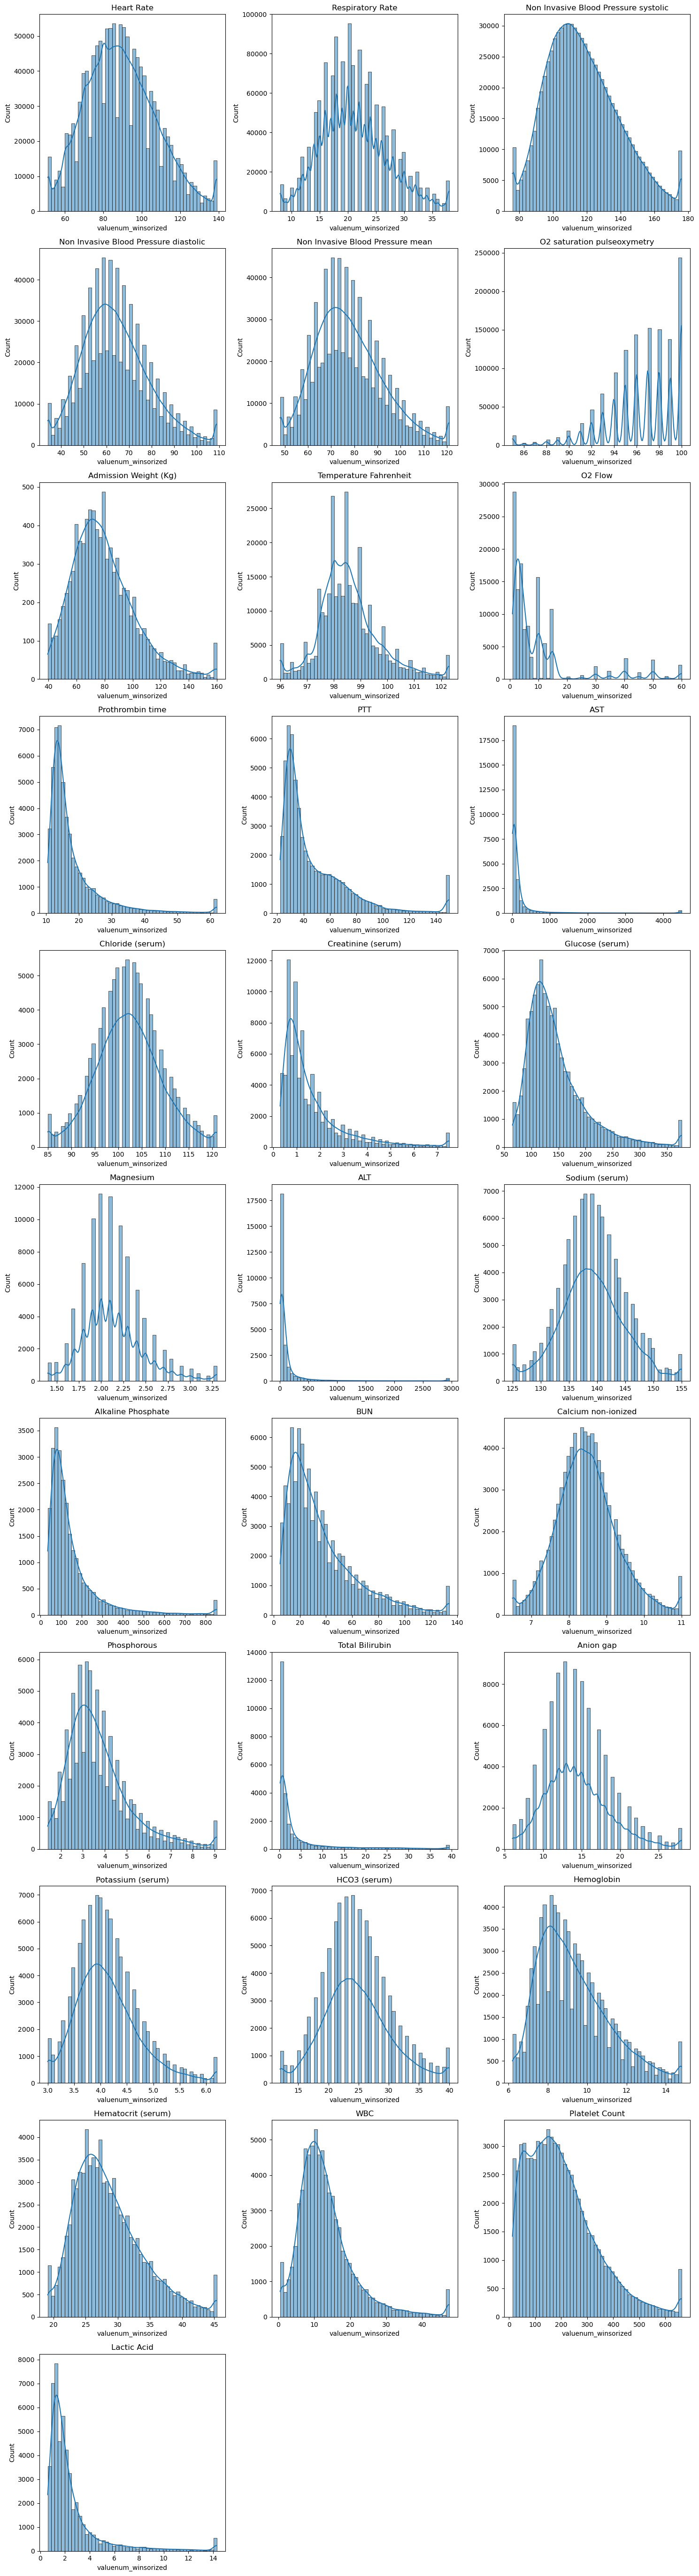

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the unique itemids for visualization
unique_itemids = icd_chart_df2["itemid"].unique()

# Set up subplots
num_items = len(unique_itemids)
num_cols = 3  # Display 3 plots per row
num_rows = (num_items // num_cols) + (1 if num_items % num_cols != 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot distributions for each itemid
for i, itemid in enumerate(unique_itemids):
    ax = axes[i]

    # Get label associated with the itemid, handling missing values
    label_row = icd_chart_df2.loc[icd_chart_df2["itemid"] == itemid, "label"]
    label = label_row.iloc[0] if not label_row.isna().all() else f"ItemID: {itemid}"  # Fallback if label is NaN

    # Plot distribution
    sns.histplot(icd_chart_df2[icd_chart_df2["itemid"] == itemid]["valuenum_winsorized"], bins=50, kde=True, ax=ax)
    ax.set_title(f"{label}")  # Use label if available

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Create dictionary of lab names

In [266]:
icd_chart_df2['stay_id'].nunique()


9864

In [191]:
icu_stay_df['stay_id'].nunique()

9864

In [193]:
lab_summary_df['stay_id'].nunique()

9864

In [267]:
lab_summary_df.describe()

# Create a dictionary mapping itemid to lab test names from the long dataset
id_to_name = icd_chart_df2.set_index("itemid")["label"].to_dict()

# Ensure unique mapping (if duplicate labels exist for an itemid, take the first occurrence)
id_to_name = {k: v for k, v in id_to_name.items() if pd.notna(v)}

# Example output: {50820: "Sodium (serum)", 50902: "Glucose (serum)", ...}
print(id_to_name)


{'220045': 'Heart Rate', '220210': 'Respiratory Rate', '220179': 'Non Invasive Blood Pressure systolic', '220180': 'Non Invasive Blood Pressure diastolic', '220181': 'Non Invasive Blood Pressure mean', '220277': 'O2 saturation pulseoxymetry', '226512': 'Admission Weight (Kg)', '223761': 'Temperature Fahrenheit', '223834': 'O2 Flow', '227465': 'Prothrombin time', '227466': 'PTT', '220587': 'AST', '220602': 'Chloride (serum)', '220615': 'Creatinine (serum)', '220621': 'Glucose (serum)', '220635': 'Magnesium', '220644': 'ALT', '220645': 'Sodium (serum)', '225612': 'Alkaline Phosphate', '225624': 'BUN', '225625': 'Calcium non-ionized', '225677': 'Phosphorous', '225690': 'Total Bilirubin', '227073': 'Anion gap', '227442': 'Potassium (serum)', '227443': 'HCO3 (serum)', '220228': 'Hemoglobin', '220545': 'Hematocrit (serum)', '220546': 'WBC', '227457': 'Platelet Count', '225668': 'Lactic Acid'}


In [268]:
icu_stay_df2['stay_id'].nunique()
icu_stay_df2.describe()

,subject_id,stay_id,intime,outtime,Age,hospital_death,hadm_id,los,has_E87,has_J18,has_I50,has_N17,has_J96,has_E11,has_I25,has_E78,has_J98,has_Z51,has_I47,has_I10,has_D64,has_Z95,has_N18
count,9.864000e+03,9.864000e+03,9864,9864,9864.000000,9864.000000,9.864000e+03,9864.000000,9864.000000,9864.0,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000
mean,1.507513e+07,3.500682e+07,2154-09-19 06:57:12.991180800,2154-09-24 06:28:54.200730624,65.563159,0.136861,2.502345e+07,119.528114,0.603609,1.0,0.406427,0.491687,0.348540,0.307989,0.295316,0.394566,0.343471,0.317822,0.272202,0.331813,0.282137,0.232563,0.289132
min,1.000184e+07,3.000048e+07,2110-01-18 17:47:47,2110-01-20 22:25:09,18.000000,0.000000,2.000177e+07,0.058056,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.262917e+07,3.254895e+07,2135-02-14 17:13:08,2135-02-23 10:15:28.500000768,56.000000,0.000000,2.257665e+07,34.078333,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.510512e+07,3.499424e+07,2154-07-08 06:13:27.499999232,2154-07-12 23:27:59.000000512,67.000000,0.000000,2.507162e+07,67.216667,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.758974e+07,3.748762e+07,2174-09-29 01:02:25.750000640,2174-09-30 11:44:44,78.000000,0.000000,2.749361e+07,142.856806,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.999962e+07,3.999923e+07,2213-04-25 21:10:33,2213-05-02 18:44:28,91.000000,1.000000,2.999950e+07,3264.697778,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,2.866315e+06,2.870367e+06,NaN,NaN,15.838684,0.343718,2.874262e+06,159.493894,0.489172,0.0,0.491191,0.499956,0.476532,0.461685,0.456208,0.488782,0.474891,0.465654,0.445116,0.470888,0.450063,0.422487,0.453382


In [269]:
# Find hadm_ids that appear more than once
duplicate_hadm_ids = icu_stay_df2["stay_id"].value_counts()
duplicate_hadm_ids = duplicate_hadm_ids[duplicate_hadm_ids > 1]

# View all rows where hadm_id is duplicated
duplicated_rows = icu_stay_df2[icu_stay_df["stay_id"].isin(duplicate_hadm_ids.index)]

In [270]:
duplicated_rows

,subject_id,stay_id,intime,outtime,Age,gender,ethnicity,insurance,hospital_death,dod,hadm_id,los,has_E87,has_J18,has_I50,has_N17,has_J96,has_E11,has_I25,has_E78,has_J98,has_Z51,has_I47,has_I10,has_D64,has_Z95,has_N18


In [271]:

# Rename lab_summary_df columns based on itemid mapping
lab_summary_df.rename(
    columns={f"Lab_{itemid}_{stat}": f"{id_to_name.get(itemid, f'Unknown Lab {itemid}')}_{stat}"
             for itemid in id_to_name.keys()
             for stat in ["min", "mean", "max"]},
    inplace=True
)

# Sort columns to ensure each lab’s min, mean, max appear together
sorted_cols = sorted(lab_summary_df.columns[1:], key=lambda x: (x.split("_")[0], x.split("_")[-1]))  # Sorting by lab name, then stat
lab_summary_df = lab_summary_df[["stay_id"] + sorted_cols]

# Display updated lab_summary_df
print(lab_summary_df.head())

lab_summary_df.to_csv("notebooks/ehrapy_data/aggregated_labs.csv.gz", index=False)

    stay_id  ALT_max  ...   WBC_mean  WBC_min
0  30000484     15.0  ...  20.633333     18.3
1  30000831    183.0  ...  15.300000     12.7
2  30002498      NaN  ...  12.900000     12.9
3  30003598     31.0  ...  11.028571      8.5
4  30004320      NaN  ...  18.500000     18.5

[5 rows x 94 columns]


In [273]:
# Merge lab data into icu_stay_df
icu_stay_merged = icu_stay_df2.merge(lab_summary_df, on="stay_id", how="left")

# Display merged dataset
print(icu_stay_merged.head())


   subject_id   stay_id  ...   WBC_mean WBC_min
0    10001843  39698942  ...  12.150000    10.5
1    10002155  33685454  ...   4.942857     3.8
2    10002155  31090461  ...   8.475000     6.9
3    10002155  32358465  ...   7.100000     7.1
4    10002428  33987268  ...  26.066667    20.4

[5 rows x 120 columns]


In [274]:
#icu_stay_merged.to_csv("notebooks/ehrapy_data/icu_stay_labsdiag.csv.gz", index=False)

In [253]:
icu_stay_merged = pd.read_csv("notebooks/ehrapy_data/icu_stay_labsdiag.csv.gz")


Let's prepare procedures data now.

In [275]:
icd_proc_df = pd.read_csv("data/features/preproc_proc_icu.csv.gz")
icd_proc_df = icd_proc_df.merge(d_items[['itemid', 'label', 'linksto', 'category']], left_on='itemid', right_on='itemid', how='left')

In [276]:
icd_proc_df  = icd_proc_df[icd_proc_df["stay_id"].isin(pneumonia_stay_ids)].copy()

In [230]:
#icd_proc_df.to_csv('./notebooks/clean/icd_proc_df.csv.gz')

In [282]:
# Ensure itemid is treated as a string
icd_proc_df["itemid"] = icd_proc_df["itemid"].astype(str)


# Count how many unique ICU stays each itemid appears in
proc_by_stay = icd_proc_df.groupby("itemid")["stay_id"].nunique()

# Dynamically get the total number of unique ICU stays
total_stays = icd_proc_df["stay_id"].nunique()

# Keep only itemids that appear in at least 60% of ICU stays
most_common_procs = proc_by_stay.loc[(proc_by_stay / total_stays) > 0.1]

# Convert itemid index to a list
idx_proc_lst = most_common_procs.index.astype(str).tolist()

# Extract labels from icd_chart_df2
id_to_name = icd_proc_df[["itemid", "label"]].drop_duplicates().set_index("itemid")["label"].to_dict()

# ✅ Create the summary DataFrame
proc_summary_df = most_common_procs.reset_index()
proc_summary_df.columns = ["itemid", "unique_stay_count"]

# Ensure itemid is a string before mapping
proc_summary_df["itemid"] = proc_summary_df["itemid"].astype(str)

# Map itemid to labels from icd_chart_df2
proc_summary_df["label"] = proc_summary_df["itemid"].map(id_to_name)
proc_summary_df = proc_summary_df[~proc_summary_df["label"].str.contains("Gauge|Family", case=False, na=False)]

# Calculate percentage of ICU stays where each itemid appears
proc_summary_df["percentage_of_stays"] = (proc_summary_df["unique_stay_count"] / total_stays) * 100

# Sort by most frequent first
proc_summary_df = proc_summary_df.sort_values(by="unique_stay_count", ascending=False)

proc_summary_df



,itemid,unique_stay_count,label,percentage_of_stays
14,225459,3804,Chest X-Ray,42.861972
16,225792,3541,Invasive Ventilation,39.898592
10,225402,3029,EKG,34.129577
15,225752,2942,Arterial Line,33.149296
2,224263,2781,Multi Lumen,31.335211
18,227194,2436,Extubation,27.447887
3,224264,2394,PICC Line,26.974648
9,225401,2347,Blood Cultured,26.445070
21,229351,2183,Foley Catheter,24.597183
0,221214,2104,CT scan,23.707042


In [295]:
idx_proc_lst

['221214',
 '221217',
 '224263',
 '224264',
 '224274',
 '224275',
 '224277',
 '224385',
 '225400',
 '225401',
 '225402',
 '225432',
 '225451',
 '225454',
 '225459',
 '225752',
 '225792',
 '225966',
 '227194',
 '228128',
 '228129',
 '229351',
 '229581']

In [297]:
# Step 1: Filter icd_proc_df to include only itemids in idx_proc_lst
filtered_proc_df = icd_proc_df[icd_proc_df["itemid"].isin(idx_proc_lst)]

# Step 2: Get unique procedures per stay_id (only for filtered itemids)
procedure_flags = filtered_proc_df.groupby("stay_id")["itemid"].unique()

# Step 3: One-hot encode only the relevant procedures
procedure_flags = procedure_flags.apply(lambda x: {item: 1 for item in x}).apply(pd.Series).fillna(0)

# Step 4: Rename columns for clarity
procedure_flags.columns = ["proc_" + str(col) for col in procedure_flags.columns]

# Step 5: Merge back with icu_stays_df
icu_stay_df3 = icu_stay_df2.merge(procedure_flags, on="stay_id", how="left").fillna(0)

# Step 6: Convert to integer type (1s and 0s)
icu_stay_df3.iloc[:, -len(procedure_flags.columns):] = icu_stay_df3.iloc[:, -len(procedure_flags.columns):].astype(int)


NEXT WE NEED TO ADD PROCEDURES AND MEDECINE AND THEN DONE

Now we'll make a dummy variable that indicates if a given icu stay involved invasive ventilation or chest x-rays

In [298]:
icd_med_df = icd_med_df.merge(d_items[['itemid', 'label', 'linksto', 'category']], left_on='itemid', right_on='itemid', how='left')
icd_med_df = icd_med_df[icd_med_df["category"] == "Medications"]

In [299]:
most_common_overall = (
    icd_med_df.groupby("label")["label"]
    .count()
    .sort_values(ascending=False)
    .head(200)
)

In [ ]:
most_common_across_patients

label
Magnesium Sulfate (Bolus)     3386
Propofol                      2871
Norepinephrine                2624
Fentanyl (Concentrate)        2364
KCL (Bolus)                   2291
Heparin Sodium                1680
Phenylephrine                 1406
Midazolam (Versed)            1378
Dexmedetomidine (Precedex)    1117
Vasopressin                    917
Acetaminophen-IV               828
Furosemide (Lasix) 250/50      720
Insulin - Regular              694
Nitroglycerin                  501
Morphine Sulfate               462
Calcium Gluconate (CRRT)       451
Furosemide (Lasix)             432
Phenylephrine (50/250)         417
KCl (CRRT)                     399
ACD-A Citrate (1000ml)         377
Epinephrine                    351
Diltiazem                      343
Amiodarone 600/500             304
Cisatracurium                  301
Dopamine                       263
Dobutamine                     224
Hydromorphone (Dilaudid)       215
Octreotide                     203
Fentanyl      

In [302]:
most_common_across_patients = (
    icd_med_df.groupby("label")["stay_id"]
    .nunique()
    .sort_values(ascending=False)
    .head(30)
)

In [301]:
# common drugs?
set(most_common_overall.index) & set(most_common_across_patients.index)

{'ACD-A Citrate (1000ml)',
 'Acetaminophen-IV',
 'Amiodarone 600/500',
 'Calcium Gluconate (CRRT)',
 'Cisatracurium',
 'Dexmedetomidine (Precedex)',
 'Diltiazem',
 'Dobutamine',
 'Dopamine',
 'Epinephrine',
 'Fentanyl',
 'Fentanyl (Concentrate)',
 'Furosemide (Lasix)',
 'Furosemide (Lasix) 250/50',
 'Heparin Sodium',
 'Hydromorphone (Dilaudid)',
 'Insulin - Regular',
 'KCL (Bolus)',
 'KCl (CRRT)',
 'Levetiracetam (Keppra)',
 'Magnesium Sulfate (Bolus)',
 'Midazolam (Versed)',
 'Morphine Sulfate',
 'Nitroglycerin',
 'Norepinephrine',
 'Octreotide',
 'Phenylephrine',
 'Phenylephrine (50/250)',
 'Propofol',
 'Vasopressin'}

In [302]:
# overall only
set(most_common_overall.index) - set(most_common_across_patients.index)

{'ACD-A Citrate (500ml)',
 'Acetylcysteine',
 'Alteplase (TPA)',
 'Aminocaproic acid (Amicar)',
 'Aminophylline',
 'Amiodarone',
 'Amiodarone 150/100',
 'Amiodarone 450/250',
 'Angiotensin II (Giapreza)',
 'Argatroban',
 'Bivalirudin (Angiomax)',
 'Bumetanide (Bumex)',
 'Calcium Chloride',
 'Calcium Gluconate (Bolus)',
 'Clevidipine (Cleviprex)',
 'Cyclosporine',
 'Dilantin',
 'Epoprostenol (Veletri)',
 'Eptifibatide (Integrilin)',
 'Esmolol',
 'Fosphenytoin',
 'Heparin Sodium (CRRT-Prefilter)',
 'Heparin Sodium (Impella)',
 'Isuprel',
 'Ketamine',
 'Labetalol',
 'Lepirudin',
 'Lidocaine',
 'Lorazepam (Ativan)',
 'Magnesium Sulfate (OB-GYN)',
 'Mannitol',
 'Methadone Hydrochloride',
 'Milrinone',
 'Mycophenolate mofetil (Cellcept)',
 'Naloxone (Narcan)',
 'Nesiritide',
 'Nicardipine',
 'Nicardipine 40mg/200',
 'Nitroprusside',
 'Pantoprazole (Protonix)',
 'Pentobarbital',
 'Phenylephrine (200/250)',
 'Procainamide',
 'Rocuronium',
 'Tirofiban (Aggrastat)',
 'Treprostinil (Remodulin)',


In [303]:
# across patients only
set(most_common_across_patients.index) - set(most_common_overall.index)

set()

In [305]:
# we will use both sets, most common overall and most common across patients
most_common_drugs = set(most_common_overall.index).union(
    set(most_common_across_patients.index) - set(most_common_overall.index)
)

In [307]:
# most common drugs make about 75% of all ICU drug prescriptions
most_common_drugs_df = icd_med_df[
    icd_med_df["label"].isin(most_common_drugs)
]

In [309]:
most_common_drugs_df['stay_id'].nunique()

6798

In [310]:
cumulative_dose_per_stay_id = most_common_drugs_df.groupby(
    ["label", "stay_id"]
).agg({"amount": "sum"})

In [311]:
cumulative_dose_per_stay_id

amount
label                  stay_id               
ACD-A Citrate (1000ml) 30016351  12093.666620
                       30066630  15406.645827
                       30078723  16827.905950
                       30099685   1394.894886
                       30111451  18002.999774
...                                       ...
Vecuronium             34958629     50.549449
                       35874356      9.999999
                       35973102     18.749999
                       36038698     17.937220
                       36307953     70.925108

[29890 rows x 1 columns]

In [312]:
result_df = cumulative_dose_per_stay_id.unstack().T.fillna(0)
result_df.reset_index().drop("level_0", inplace=True, axis=1)
result_df
result_df.to_csv('./notebooks/ehrapy_data/meds_dummied.csv.gz')

In [322]:
# add meds to icu_stay as dummies

icu_stay_df3_with_drugs = icu_stay_df3.merge(result_df, on='stay_id', how='outer')

In [323]:
# find column index for the first and last med so we can fill with zeroes for those with no measure
med_index = icu_stay_df3_with_drugs.columns.get_loc('ACD-A Citrate (1000ml)')
vec_index = icu_stay_df3_with_drugs.columns.get_loc('Vecuronium') 

In [324]:
# fill NaNs with 0 as merge produced NaNs in missing columns (icustay with no common drugs) -> set their dose to 0 for each drug
# Note: the columns 50:127 are unique to this dataset, if you change anything in regards to meds you're looking at, these will need to be updated.
icu_stay_df3_with_drugs[
    list(icu_stay_df3_with_drugs.iloc[:, 50:127].columns)
] = icu_stay_df3_with_drugs.iloc[:, 50:127].fillna(value=0)

In [ ]:
drug_hadm_df = cumulative_dose_per_stay_id.reset_index().drop(['doses_per_24_hrs'], axis=1)
drugs = set(pd.unique(drug_hadm_df["medication"]))

Really good tutorial:

https://colab.research.google.com/drive/1REu-ofzNzqsTT1cxLHIegPB0nGmwKaM0?usp=sharing#scrollTo=Ff2sz44EngAV

In [ ]:
drugs = set(pd.unique(drug_hadm_df["medication"]))

ab_matches = ["amoxi", "cef", "clinda", "imi", "mero", "azit", "vanco", "tige"]
catecholamines_matches = ["epineph", "adrena", "isopren", "dobut"]
antiviral_matches = ["vir"]
antifungal_matches = ["caspofu", "voricona"]
ab, cats, vir, fung, rest = [], [], [], [], []

for drug_ in drugs:
    if any([drug in drug_.lower() for drug in ab_matches]):
        ab.append(drug_)
    elif any([drug in drug_.lower() for drug in catecholamines_matches]):
        cats.append(drug_)
    elif any([drug in drug_.lower() for drug in antiviral_matches]):
        vir.append(drug_)
    elif any([drug in drug_.lower() for drug in antifungal_matches]):
        fung.append(drug_)
    else:
        rest.append(drug_)

In [ ]:
drug_hadm_df["received_antibiotics"] = drug_hadm_df["medication"].isin(ab)
drug_hadm_df["received_catecholamines"] = drug_hadm_df["medication"].isin(cats)
drug_hadm_df["received_antivirals"] = drug_hadm_df["medication"].isin(vir)
drug_hadm_df["received_antifungals"] = drug_hadm_df["medication"].isin(fung)
drug_hadm_df["received_rest"] = drug_hadm_df["medication"].isin(rest)

Here we grab emar data and then we need to add amounts from pharmacy df / haven't completed this code yet

In [355]:
emar_filtered = emar_filtered[emar_filtered['event_txt'] == "Administered"]

most_common_overall = (
    emar_filtered.groupby("medication")["medication"]
    .count()
    .sort_values(ascending=False)
    .head(200)
)

most_common_across_patients = (
    emar_filtered.groupby("medication")["hadm_id"]
    .nunique()
    .sort_values(ascending=False)
    .head(30)
)

set(most_common_overall.index) & set(most_common_across_patients.index)

most_common_drugs = set(most_common_overall.index).union(
    set(most_common_across_patients.index) - set(most_common_overall.index)
)

most_common_drugs_df = emar_filtered[
    emar_filtered["medication"].isin(most_common_drugs)
]

In [365]:
drug_hadm_df = cumulative_dose_per_stay_id.reset_index().drop(['doses_per_24_hrs'], axis=1)

In [366]:
drugs = set(pd.unique(drug_hadm_df["medication"]))

In [368]:
drugs = set(pd.unique(drug_hadm_df["medication"]))

ab_matches = ["amoxi", "cef", "clinda", "imi", "mero", "azit", "vanco", "tige"]
catecholamines_matches = ["epineph", "adrena", "isopren", "dobut"]
antiviral_matches = ["vir"]
antifungal_matches = ["caspofu", "voricona"]
ab, cats, vir, fung, rest = [], [], [], [], []

for drug_ in drugs:
    if any([drug in drug_.lower() for drug in ab_matches]):
        ab.append(drug_)
    elif any([drug in drug_.lower() for drug in catecholamines_matches]):
        cats.append(drug_)
    elif any([drug in drug_.lower() for drug in antiviral_matches]):
        vir.append(drug_)
    elif any([drug in drug_.lower() for drug in antifungal_matches]):
        fung.append(drug_)
    else:
        rest.append(drug_)

In [370]:
drug_hadm_df["received_antibiotics"] = drug_hadm_df["medication"].isin(ab)
drug_hadm_df["received_catecholamines"] = drug_hadm_df["medication"].isin(cats)
drug_hadm_df["received_antivirals"] = drug_hadm_df["medication"].isin(vir)
drug_hadm_df["received_antifungals"] = drug_hadm_df["medication"].isin(fung)
drug_hadm_df["received_rest"] = drug_hadm_df["medication"].isin(rest)

In [371]:
# True -> 1, False -> 0 , sum > 0 means this drug has been given in this HADM ID
drug_flg_df = (
    drug_hadm_df.groupby("hadm_id")
    .agg(
        {
            "received_antibiotics": "sum",
            "received_catecholamines": "sum",
            "received_antivirals": "sum",
            "received_antifungals": "sum",
            "received_rest": "sum",
        }
    )
    .reset_index()
)
drug_flg_df["received_antibiotics"] = np.where(
    drug_flg_df["received_antibiotics"] > 0, 1, 0
)
drug_flg_df["received_catecholamines"] = np.where(
    drug_flg_df["received_catecholamines"] > 0, 1, 0
)
drug_flg_df["received_antivirals"] = np.where(
    drug_flg_df["received_antivirals"] > 0, 1, 0
)
drug_flg_df["received_antifungals"] = np.where(
    drug_flg_df["received_antifungals"] > 0, 1, 0
)
drug_flg_df["received_rest"] = np.where(drug_flg_df["received_rest"] > 0, 1, 0)

In [372]:
## Use this to add dummy medecine variable to df
#df = pd.read_csv("./notebooks/ehrapy_data/icu_stay_labs.csv.gz")
final_df = pd.merge(icu_stay_df3, drug_flg_df, on="hadm_id", how="left")
final_df["received_antibiotics"] = final_df["received_antibiotics"].fillna(0)
final_df["received_catecholamines"] = final_df["received_catecholamines"].fillna(0)
final_df["received_antivirals"] = final_df["received_antivirals"].fillna(0)
final_df["received_antifungals"] = final_df["received_antifungals"].fillna(0)
final_df["received_rest"] = final_df["received_rest"].fillna(0)

In [374]:
final_df.to_csv("./notebooks/ehrapy_data/icu_diaglabsprocmeds.csv.gz", index=False)

In [ ]:
drugs

In [356]:
# Step 1: Perform the merge on hadm_id, poe_id, and pharmacy_id
most_common_drugs_df = most_common_drugs_df.merge(
    pharma_filtered_df[["hadm_id", "poe_id", "pharmacy_id", "doses_per_24_hrs"]],  # Select relevant columns
    on=["hadm_id", "poe_id", "pharmacy_id"],  # Merge on these keys
    how="left"  # Keep all rows from emar_filtered_df, add doses where matches exist
)

cumulative_dose_per_stay_id = most_common_drugs_df.groupby(
    ["medication", "hadm_id"]
).agg({"doses_per_24_hrs": "sum"})

In [358]:
result_df = cumulative_dose_per_stay_id.unstack().T.fillna(0)
result_df.reset_index().drop("level_0", inplace=True, axis=1)
result_df
result_df.to_csv('./notebooks/ehrapy_data/pharma_dummied.csv.gz')
icu_stay_df3_with_drugs2 = icu_stay_df3.merge(result_df, on='hadm_id', how='outer')

In [ ]:
#icu_say_df_with_drugs = icu_stay_merged.merge(result_df, on="stay_id", how="outer")

Processing and joining microbiology data

** note microbio can have info that can help determine baseline as there is info pre-dating hospital stay in some cases in these data

If no growth is found, the org_itemid and org_name subsequent columns will be NULL, and there will only be a single row for the micro_specimen_id

f an organism is found, then each organism will be present as a single row. Each unique organism is assigned a unique org_itemid, and d_micro provides the interpretable name for these organisms.

In [412]:
microbio_df = pd.read_csv("mimiciv/2.0/hosp/microbiologyevents.csv.gz")
# filter microbio data for our cohort ids
microbio_df = microbio_df[microbio_df["hadm_id"].isin(pneumonia_hadm_ids)]

microbio_df = microbio_df[['subject_id', 'hadm_id', 'charttime', 'storetime', 'test_name', 'org_itemid', 'org_name', 'spec_itemid','ab_itemid', 'ab_name', 'dilution_text', 'interpretation']]

In [387]:
# some hadm (although listed) do not provide any info on organisms --> delete
microbio_df = microbio_df[microbio_df.org_name.notnull()]

In [388]:
microbio_df["charttime"] = microbio_df["charttime"].str.split(" ").str.get(0)


In [390]:
#Get an overview regarding the specimens and different pathogens found.
count_grp = (
    microbio_df.groupby("org_name")["hadm_id"].agg("count").sort_values(ascending=False)
)

In [391]:
neg_probes = [
    "No ",
    "no ",
    "CANCELLED",
    "NEGATIVE",
    "Normal",
    "without",
]  # checked before to not remove some important organisms

pattern = "|".join(neg_probes)

neg_removed = count_grp.loc[~count_grp.index.str.contains(pattern, case=False)]

In [392]:
# include top 40 organisms (others were found in less than 200 hadms)
top_org_names = neg_removed.head(n=40).index.to_list()

In [ ]:
top_org_names

In [ ]:
count_grp.head(n=20)

In [396]:
microbio_df2 = microbio_df[microbio_df["org_name"].isin(top_org_names)]

In [397]:
#Add a flag column whether a HADM was tested positive for a specific organism or not
unique_species = microbio_df2.groupby(["hadm_id", "org_name"])["charttime"].unique()

In [ ]:
unique_species

In [399]:

grp_ = microbio_df2.groupby(["org_name", "hadm_id"]).agg(
    {"org_name": "unique", "charttime": "unique"}
)
grp_["charttime"] = grp_["charttime"].str[0]
grp_.drop(["org_name"], axis=1, inplace=True)

In [ ]:
grp_

In [401]:
result_df = grp_.unstack().T.fillna(0)

In [402]:
result_df = result_df.reset_index()

In [403]:
result_df = result_df.drop("level_0", axis=1)

In [404]:
pneumonia_pathogens = result_df.filter(
    regex="(?i)baum|aeruginos|agalacti|aureu|HADM|entero"
)

# You can use this code to add the info to an andata ehrapy df

In [405]:
import ehrapy as ep

#adata = ep.io.read_h5ad("./adata_pneumonia_unspecified_rest_annotated.h5ad")
adata = ep.io.read_csv("./notebooks/ehrapy_data/icu_diaglabsprocmeds.csv.gz")

In [408]:
adata.obs
#https://github.com/theislab/ehrapy-reproducibility/blob/main/pic_preprocessing_scripts/Microbiology_preprocessing.ipynb


,intime,outtime
0,2134-12-05 18:50:03,2134-12-06 14:38:26
1,2129-08-04 12:45:00,2129-08-10 17:02:38
2,2130-09-24 00:50:00,2130-09-27 22:13:41
3,2131-03-09 21:33:00,2131-03-10 18:09:21
4,2156-04-12 16:24:18,2156-04-17 15:57:08
...,...,...
9859,2186-12-06 10:12:48,2186-12-08 10:35:10
9860,2178-10-01 08:51:00,2178-10-03 23:25:08
9861,2132-08-18 14:18:47,2132-08-19 03:07:45
9862,2197-07-26 03:31:06,2197-07-27 16:07:29


In [ ]:

pneumonia_pathogens = pneumonia_pathogens[
    pneumonia_pathogens["hadm_id"].isin(adata.obs["hadm_id"])
]

In [ ]:
non_zero_counts = pneumonia_pathogens.astype(bool).sum()
print(non_zero_counts)

In [409]:
org_col_only = set(result_df.columns) - {"hadm_id"}

In [410]:
# add to icustays df
for org in org_col_only:
    hadm_id_org = {
        hadm_id: org for hadm_id, org in zip(result_df["hadm_id"], result_df[org])
    }
    icu_stay_df3_with_drugs[f"{org}_positive"] = icu_stay_df3_with_drugs["hadm_id"].map(hadm_id_org)

In [411]:
# non exisiting hadms in micriobiology events were not tested positive
org_col_only = [org_col + "_positive" for org_col in org_col_only]
icu_stay_df3_with_drugs[org_col_only] = icu_stay_df3_with_drugs.loc[:, org_col_only].fillna(value=0)

In [417]:
result_df.to_csv('./notebooks/ehrapy_data/microbio_dummied.csv.gz')

In [418]:
icu_stay_df3_with_drugs.to_csv("./notebooks/ehrapy_data/final_icu.csv.gz")

## Positive Sputum Cultures

In [414]:
microbio_df = pd.read_csv("mimiciv/2.0/hosp/microbiologyevents.csv.gz")
# filter microbio data for our cohort ids
microbio_df = microbio_df[microbio_df["hadm_id"].isin(pneumonia_hadm_ids)]

microbio_df = microbio_df[['subject_id', 'hadm_id', 'charttime', 'storetime', 'test_name', 'org_itemid', 'org_name', 'spec_itemid','ab_itemid', 'ab_name', 'dilution_text', 'interpretation']]

In [ ]:
microbio_df = microbio_df[microbio_df["spec_itemid"].str.contains("LIS0166|LIS039112")] # need to find the correct IDs for these